In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession 

In [80]:
spark = SparkSession.builder.appName("ExemploAtividade").getOrCreate()
#iniciando SparkSession

df = spark.read.csv('./dados/gas_preco.csv', sep='\t', header=True, inferSchema=True)
#Lendo arquivo csv utilizando spark

In [81]:
df.show()

#imprimindo o dataset 

+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|      REGIÃO|             ESTADO|         PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+-------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------

In [82]:
df.show(5)
#imprime 5 primeiras linhas 

+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+------------------------+------------------------+--------------------------+-------------------------+-------------------------+-----------------------------+
|DATA INICIAL|DATA FINAL|      REGIÃO|            ESTADO|         PRODUTO|NÚMERO DE POSTOS PESQUISADOS|UNIDADE DE MEDIDA|PREÇO MÉDIO REVENDA|DESVIO PADRÃO REVENDA|PREÇO MÍNIMO REVENDA|PREÇO MÁXIMO REVENDA|MARGEM MÉDIA REVENDA|COEF DE VARIAÇÃO REVENDA|PREÇO MÉDIO DISTRIBUIÇÃO|DESVIO PADRÃO DISTRIBUIÇÃO|PREÇO MÍNIMO DISTRIBUIÇÃO|PREÇO MÁXIMO DISTRIBUIÇÃO|COEF DE VARIAÇÃO DISTRIBUIÇÃO|
+------------+----------+------------+------------------+----------------+----------------------------+-----------------+-------------------+---------------------+--------------------+--------------------+--------------------+--

In [83]:
df.printSchema()
#imprimindo colunas e seu respectivo tipo de dado

root
 |-- DATA INICIAL: date (nullable = true)
 |-- DATA FINAL: date (nullable = true)
 |-- REGIÃO: string (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- PRODUTO: string (nullable = true)
 |-- NÚMERO DE POSTOS PESQUISADOS: integer (nullable = true)
 |-- UNIDADE DE MEDIDA: string (nullable = true)
 |-- PREÇO MÉDIO REVENDA: double (nullable = true)
 |-- DESVIO PADRÃO REVENDA: double (nullable = true)
 |-- PREÇO MÍNIMO REVENDA: double (nullable = true)
 |-- PREÇO MÁXIMO REVENDA: double (nullable = true)
 |-- MARGEM MÉDIA REVENDA: string (nullable = true)
 |-- COEF DE VARIAÇÃO REVENDA: double (nullable = true)
 |-- PREÇO MÉDIO DISTRIBUIÇÃO: string (nullable = true)
 |-- DESVIO PADRÃO DISTRIBUIÇÃO: string (nullable = true)
 |-- PREÇO MÍNIMO DISTRIBUIÇÃO: string (nullable = true)
 |-- PREÇO MÁXIMO DISTRIBUIÇÃO: string (nullable = true)
 |-- COEF DE VARIAÇÃO DISTRIBUIÇÃO: string (nullable = true)



In [84]:
from pyspark.sql.functions import col

#importando funções sql

In [85]:
df = df.withColumn("MARGEM MÉDIA REVENDA", col("MARGEM MÉDIA REVENDA").cast("double"))
df = df.withColumn("PREÇO MÉDIO DISTRIBUIÇÃO", col("PREÇO MÉDIO DISTRIBUIÇÃO").cast("double"))
df = df.withColumn("DESVIO PADRÃO DISTRIBUIÇÃO", col("DESVIO PADRÃO DISTRIBUIÇÃO").cast("double"))
df = df.withColumn("PREÇO MÍNIMO DISTRIBUIÇÃO", col("PREÇO MÍNIMO DISTRIBUIÇÃO").cast("double"))
df = df.withColumn("PREÇO MÁXIMO DISTRIBUIÇÃO", col("PREÇO MÁXIMO DISTRIBUIÇÃO").cast("double"))
df = df.withColumn("COEF DE VARIAÇÃO DISTRIBUIÇÃO", col("COEF DE VARIAÇÃO DISTRIBUIÇÃO").cast("double"))

#alterando tipo de dado(string -> double) das colunas : MARGEM MÉDIA REVENDA, PREÇO MÉDIO DISTRIBUIÇÃO, DESVIO PADRÃO DISTRIBUIÇÃO, PREÇO MÍNIMO DISTRIBUIÇÃO, PREÇO MÁXIMO DISTRIBUIÇÃO e COEF DE VARIAÇÃO DISTRIBUIÇÃO

In [86]:
df.printSchema()
#imprimindo colunas com os tipo de dados alterados

root
 |-- DATA INICIAL: date (nullable = true)
 |-- DATA FINAL: date (nullable = true)
 |-- REGIÃO: string (nullable = true)
 |-- ESTADO: string (nullable = true)
 |-- PRODUTO: string (nullable = true)
 |-- NÚMERO DE POSTOS PESQUISADOS: integer (nullable = true)
 |-- UNIDADE DE MEDIDA: string (nullable = true)
 |-- PREÇO MÉDIO REVENDA: double (nullable = true)
 |-- DESVIO PADRÃO REVENDA: double (nullable = true)
 |-- PREÇO MÍNIMO REVENDA: double (nullable = true)
 |-- PREÇO MÁXIMO REVENDA: double (nullable = true)
 |-- MARGEM MÉDIA REVENDA: double (nullable = true)
 |-- COEF DE VARIAÇÃO REVENDA: double (nullable = true)
 |-- PREÇO MÉDIO DISTRIBUIÇÃO: double (nullable = true)
 |-- DESVIO PADRÃO DISTRIBUIÇÃO: double (nullable = true)
 |-- PREÇO MÍNIMO DISTRIBUIÇÃO: double (nullable = true)
 |-- PREÇO MÁXIMO DISTRIBUIÇÃO: double (nullable = true)
 |-- COEF DE VARIAÇÃO DISTRIBUIÇÃO: double (nullable = true)



In [87]:
pd.DataFrame(df.take(10), columns=df.columns)

#Convertendo dataframe pyspark para dataframe pandas e imprimindo as 10 primeiras linhas

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35000,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.100,0.068,0.7332,1.29400,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.29720,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.35410,0.096


In [88]:
df.groupby('ESTADO').count().toPandas()

#Separa a coluna estado, imprimindo e mostrando o número de ocorrências

,ESTADO,count
0,RIO DE JANEIRO,4819
1,RIO GRANDE DO SUL,4819
2,RONDONIA,3950
3,MATO GROSSO,4566
4,ESPIRITO SANTO,4815
5,SERGIPE,4795
6,AMAZONAS,4414
7,RIO GRANDE DO NORTE,4818
8,SANTA CATARINA,4818
9,PARAIBA,4819


In [89]:
estados = df.select("ESTADO").distinct().orderBy("ESTADO")

estados.show()

#Selecionando coluna ESTADO e imprimindo em ordem alfabética

+-------------------+
|             ESTADO|
+-------------------+
|               ACRE|
|            ALAGOAS|
|              AMAPA|
|           AMAZONAS|
|              BAHIA|
|              CEARA|
|   DISTRITO FEDERAL|
|     ESPIRITO SANTO|
|              GOIAS|
|           MARANHAO|
|        MATO GROSSO|
| MATO GROSSO DO SUL|
|       MINAS GERAIS|
|               PARA|
|            PARAIBA|
|             PARANA|
|         PERNAMBUCO|
|              PIAUI|
|     RIO DE JANEIRO|
|RIO GRANDE DO NORTE|
+-------------------+
only showing top 20 rows



In [90]:
pd.DataFrame(df.take(10), columns=df.columns)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35000,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.100,0.068,0.7332,1.29400,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.29720,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.35410,0.096


C:\Users\Lucas Vinicius\AppData\Local\Temp\ipykernel_2160\3957442906.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'DATA FINAL': pd.date_range(start='09/05/2004', periods=10, freq='M'),


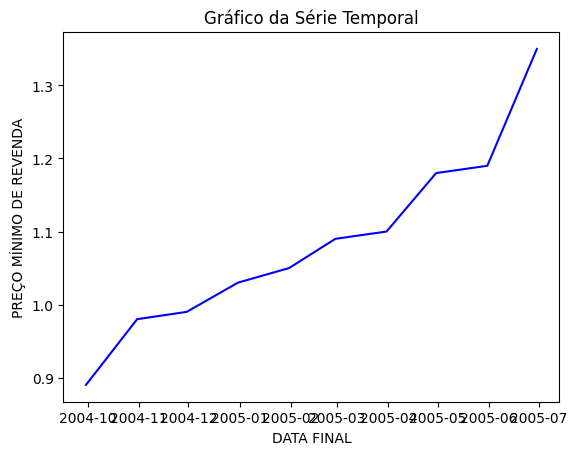

In [91]:
data = {
    'DATA FINAL': pd.date_range(start='09/05/2004', periods=10, freq='M'),
    'PREÇO MÍNIMO DE REVENDA': [0.89, 0.98, 0.99, 1.03, 1.05, 1.09, 1.10, 1.18, 1.19, 1.35]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Plota a série temporal
plt.plot(df['DATA FINAL'], df['PREÇO MÍNIMO DE REVENDA'], linestyle='-', color='b')

# Título do gráfico
plt.title('Gráfico da Série Temporal')

# Rótulo do eixo X
plt.xlabel('DATA FINAL')

# Rótulo do eixo Y
plt.ylabel('PREÇO MÍNIMO DE REVENDA')

# Exibir o gráfico
plt.show()